<a href="https://colab.research.google.com/github/Chrisolande/Machine-Learning-and-Data-Science-Projects/blob/main/Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Dataset**

**Context**

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

**Content**

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [1]:
"""General Libraries"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

"""Machine Learning"""
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

"""Deep Learning"""
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

Saving heart.csv to heart.csv


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# Data Preprocessing

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

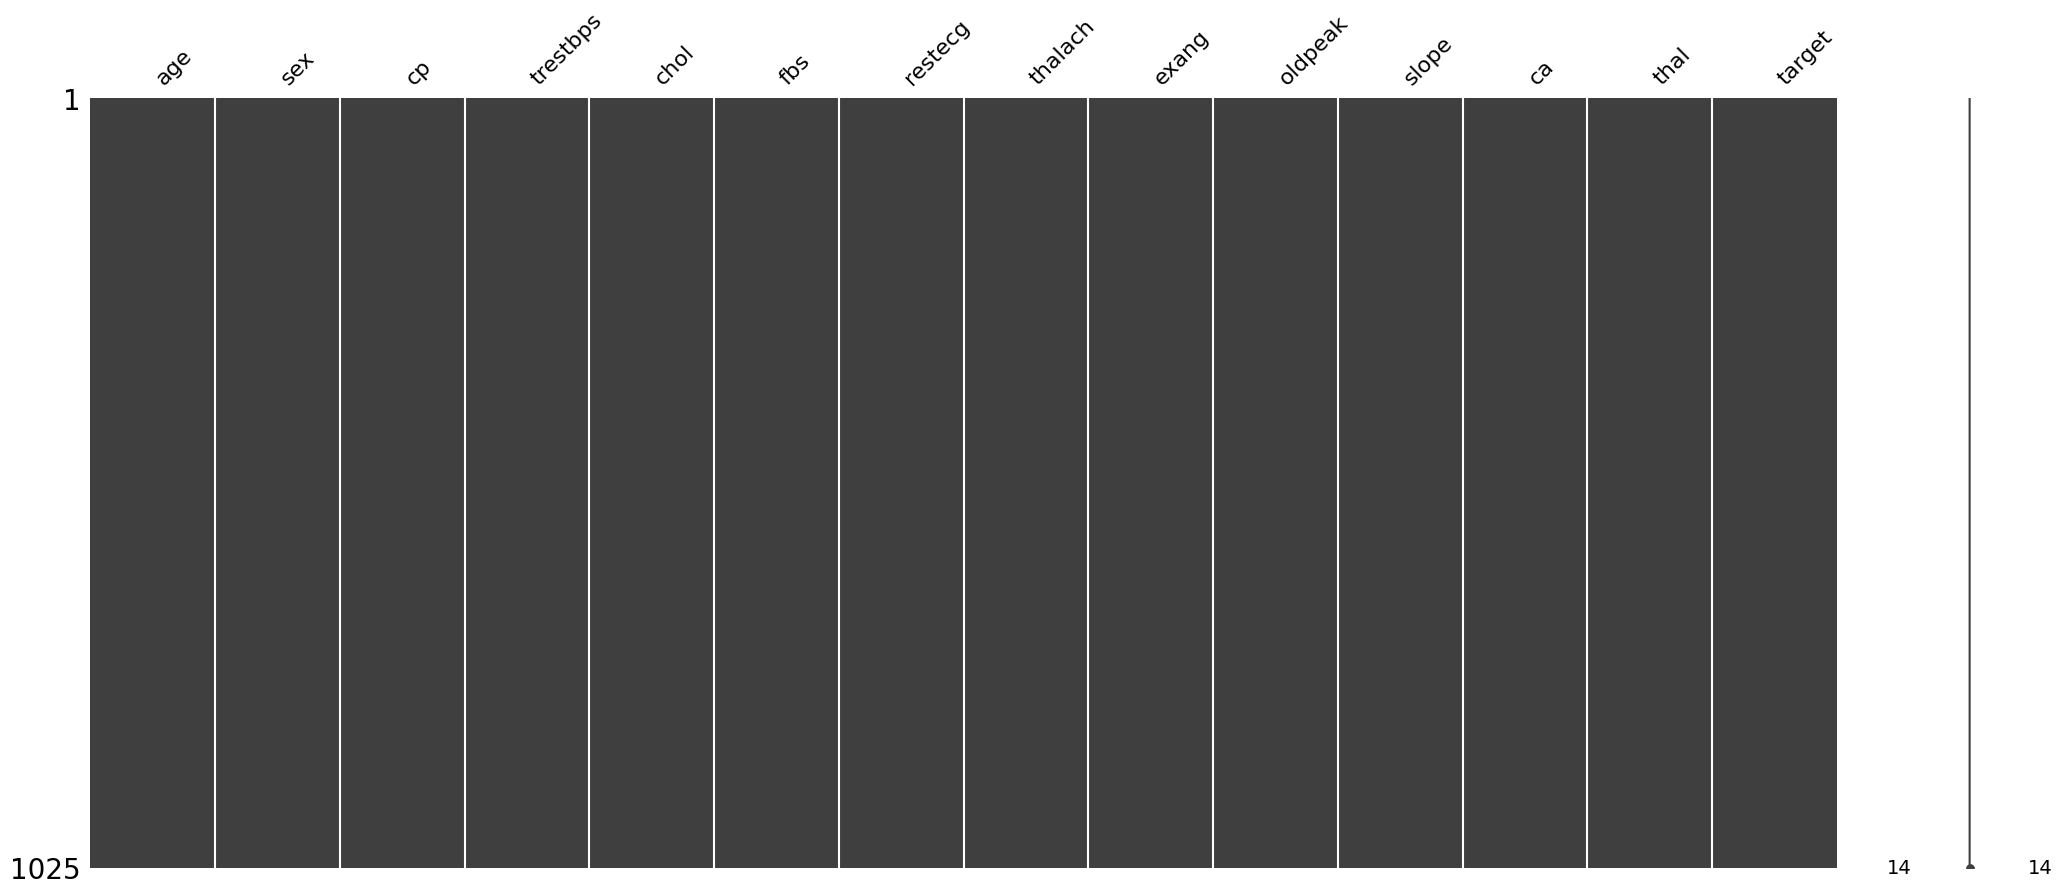

In [8]:
msno.matrix(df)

In [9]:
df.duplicated().sum()

723

In [10]:
perc_dupl = round((df.duplicated().sum() * 100 / (df.shape[0] * df.shape[1])), 2)

print(f"Duplicated Values Account for {perc_dupl}.d% of the data")

Duplicated Values Account for 5.04.d% of the data


**Observation**

* There are no null values in the dataset as shown in the matrix

* There are numerous numbers of duplicated values in the dataset accounting for 4.15% of the entire data

## Handling the duplicated values

In [11]:
df = df.drop_duplicates()

# Exploratory Data Analysis

## Distribution of continuous variables in the dataset

age
T-Statistic: 0.9866365790367126
P Value: 0.0067442781291902065
The data doesn't appear to be normally distributed
--------------------------------
trestbps
T-Statistic: 0.9657257199287415
P Value: 1.4189961348165525e-06
The data doesn't appear to be normally distributed
--------------------------------
chol
T-Statistic: 0.9465804100036621
P Value: 5.194471519587296e-09
The data doesn't appear to be normally distributed
--------------------------------
thalach
T-Statistic: 0.9767903089523315
P Value: 8.265547512564808e-05
The data doesn't appear to be normally distributed
--------------------------------


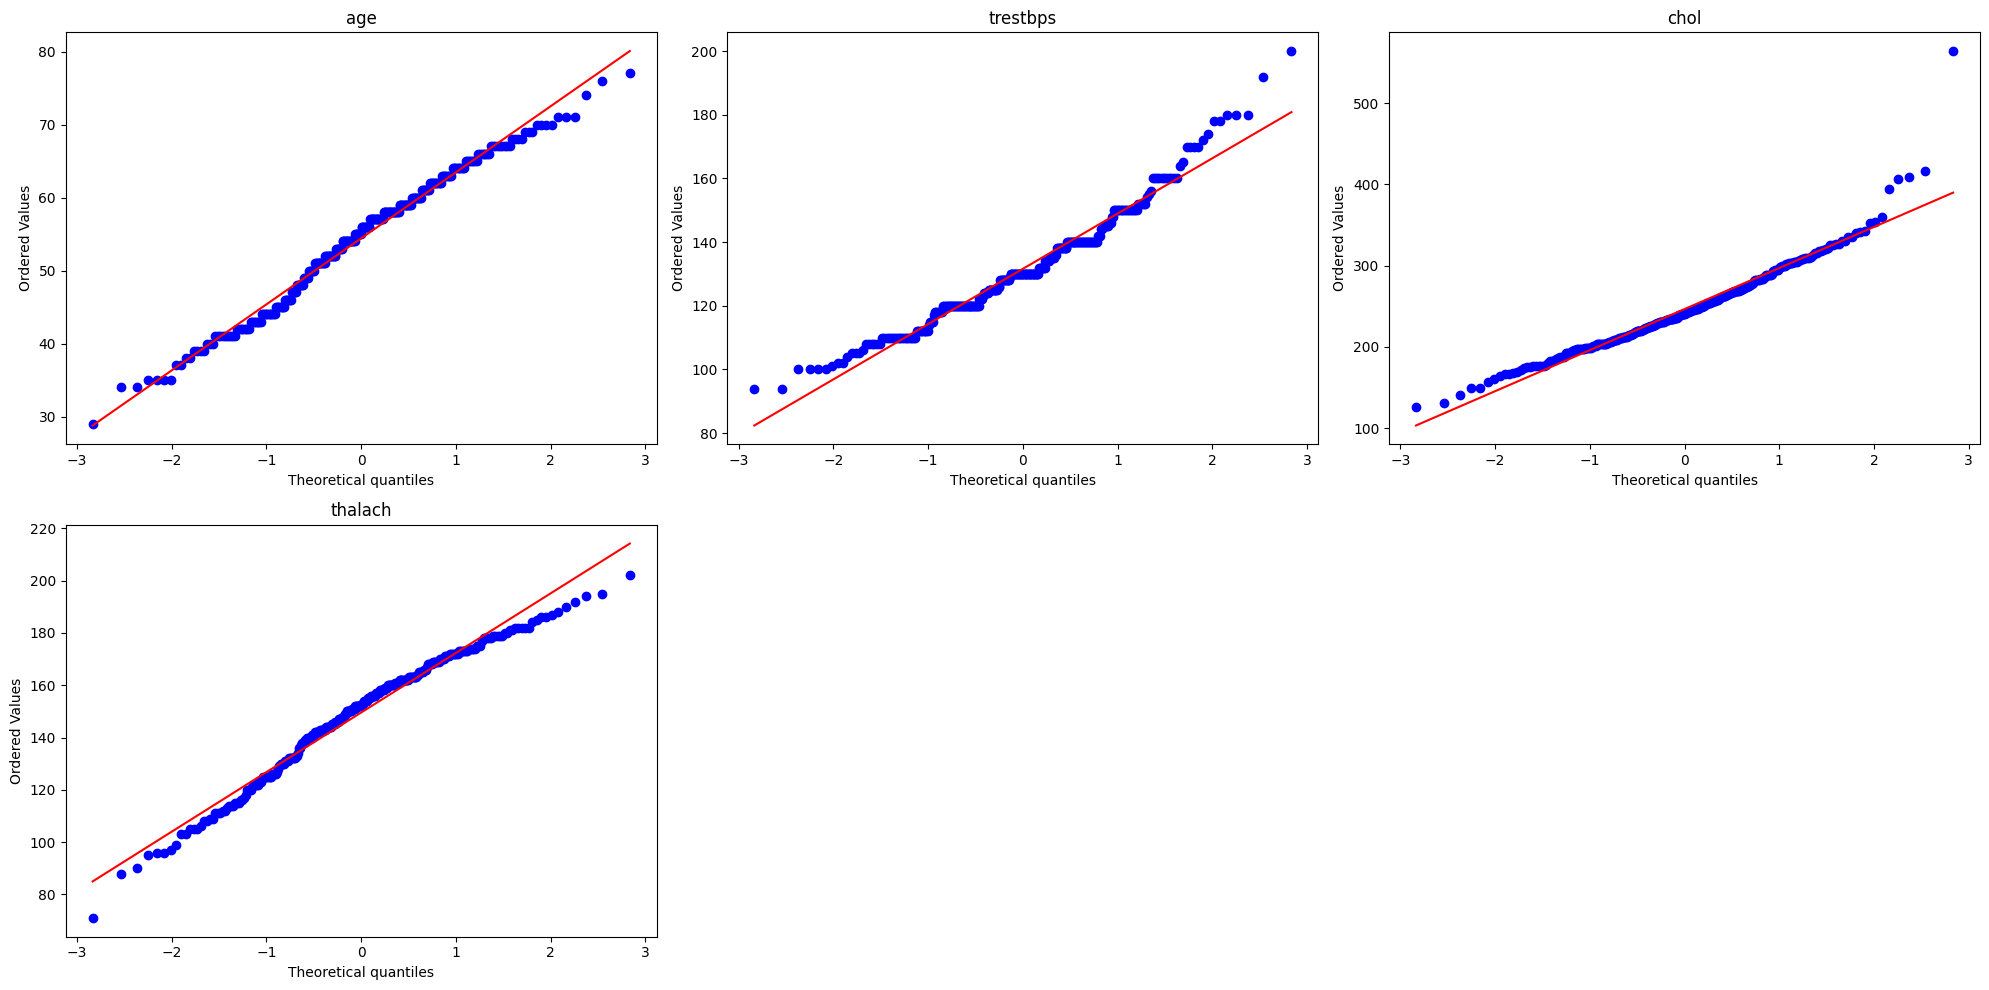

In [12]:
from scipy import stats
features = ['age', 'trestbps', 'chol', 'thalach']
num_features = len(features)

num_cols = 3

num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize= (20,10))

for i, feature in enumerate(features):

    plt.subplot(num_rows, num_cols, i+1)

    data = df[feature]

    stat, p = stats.shapiro(data)

    print(f'{feature}')

    print('T-Statistic:', stat)

    print('P Value:',p)

    if p > 0.05:

        print('The data appears to be normally distributed')

    else:

        print('The data doesn\'t appear to be normally distributed')

    print('--------------------------------')

    stats.probplot(df[feature],plot= plt)

    plt.title(f'{feature}')

plt.tight_layout()

plt.show()

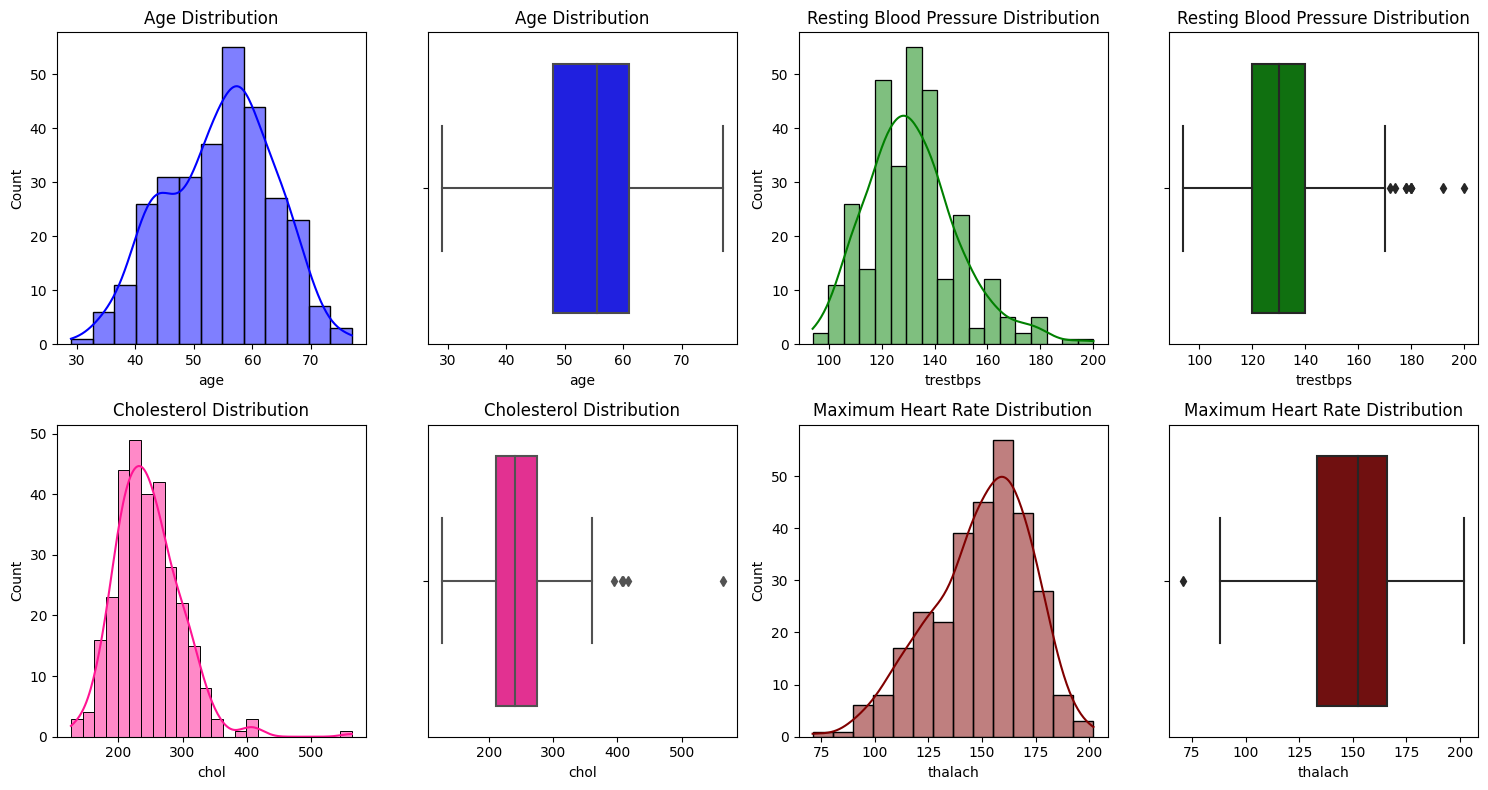

In [13]:
plt.figure(figsize= (15,8))
plt.subplot(2,4,1)
sns.histplot(data=df, x= 'age', color= 'Blue', kde=True)
plt.title('Age Distribution')

plt.subplot(2,4,2)
sns.boxplot(data=df, x= 'age', color= 'Blue')
plt.title('Age Distribution')

plt.subplot(2,4,3)
sns.histplot(data=df, x= 'trestbps', color= 'Green', kde=True)
plt.title('Resting Blood Pressure Distribution')

plt.subplot(2,4,4)
sns.boxplot(data=df, x= 'trestbps', color= 'Green')
plt.title('Resting Blood Pressure Distribution')

plt.subplot(2,4,5)
sns.histplot(data=df, x= 'chol', color= 'DeepPink', kde=True)
plt.title('Cholesterol Distribution')

plt.subplot(2,4,6)
sns.boxplot(data=df, x= 'chol', color= 'DeepPink')
plt.title('Cholesterol Distribution')

plt.subplot(2,4,7)
sns.histplot(data=df, x= 'thalach', color= 'Maroon', kde=True)
plt.title('Maximum Heart Rate Distribution')

plt.subplot(2,4,8)
sns.boxplot(data=df, x= 'thalach', color= 'Maroon')
plt.title('Maximum Heart Rate Distribution')


plt.tight_layout()
plt.show()

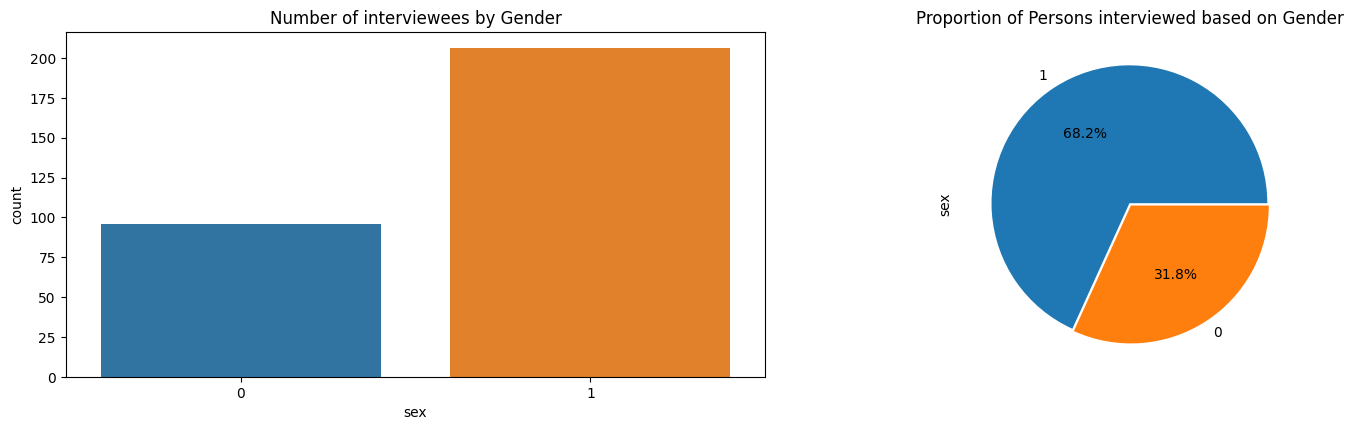

In [14]:
plt.figure(figsize= (15,8))
plt.subplot(2,2,1)
sns.countplot(data=df, x='sex')
plt.title('Number of interviewees by Gender')

plt.subplot(2,2,2)
df['sex'].value_counts().plot(kind= 'pie', explode= [0.01,0.01], autopct= '%1.1f%%')
plt.title("Proportion of Persons interviewed based on Gender")

plt.tight_layout()
plt.show()

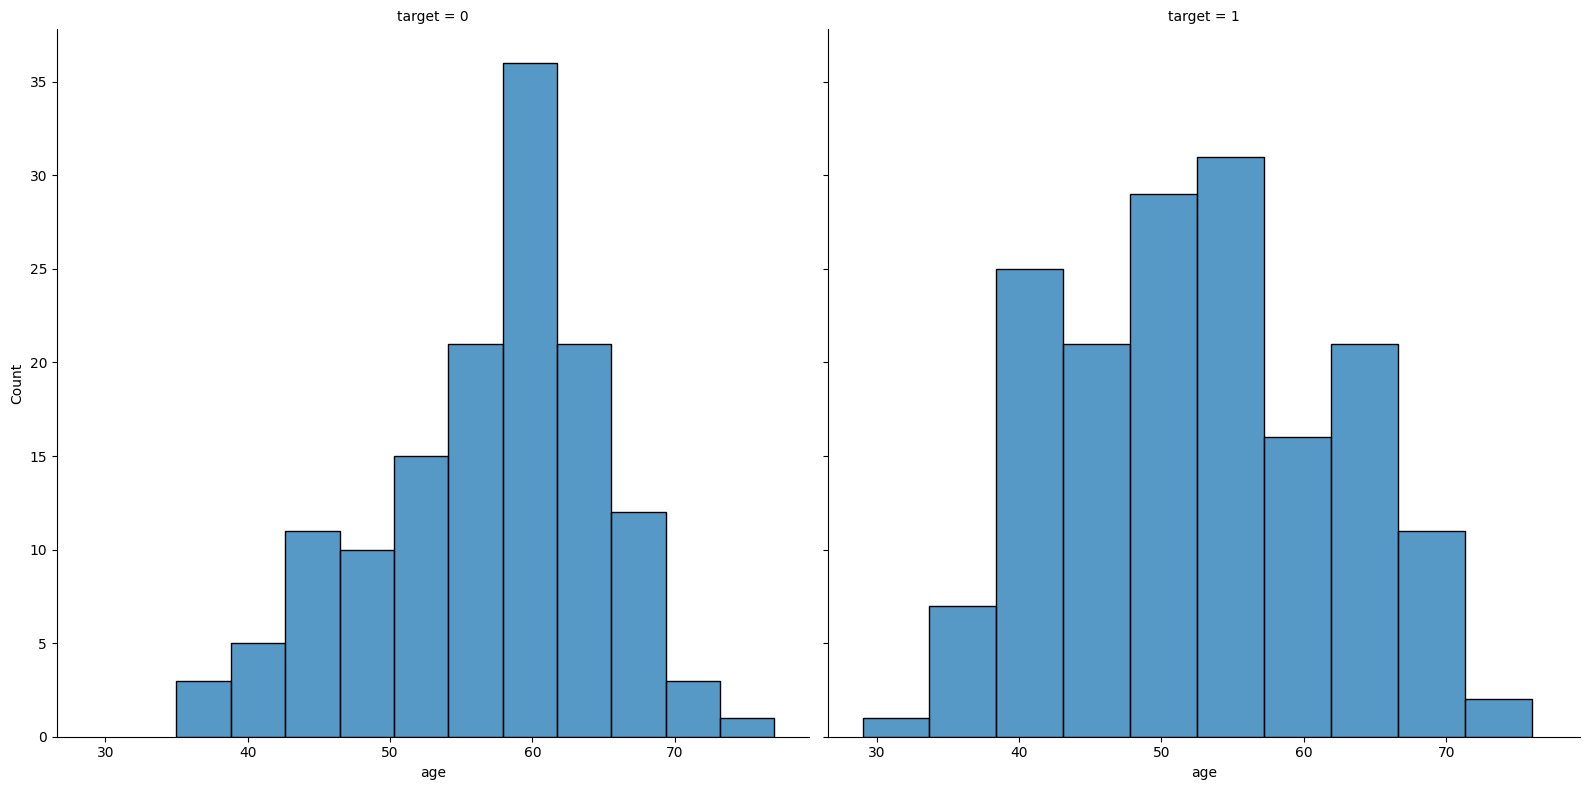

In [15]:
sns.FacetGrid(data= df, col= 'target', height= 8).map(sns.histplot,'age')
plt.show()

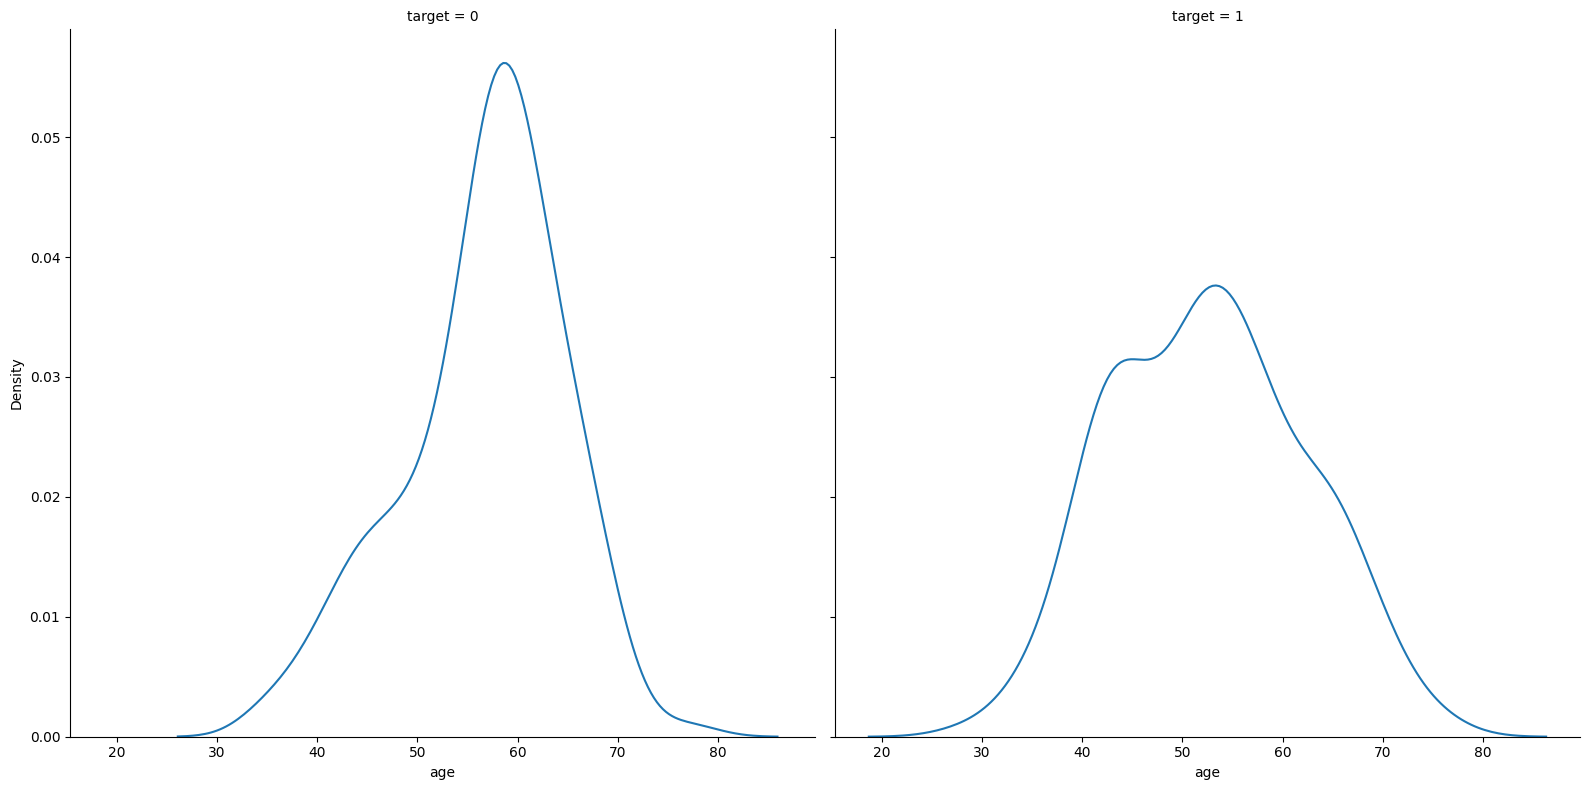

In [16]:
sns.FacetGrid(data=df, col= 'target', height= 8).map(sns.kdeplot, 'age')
plt.show()

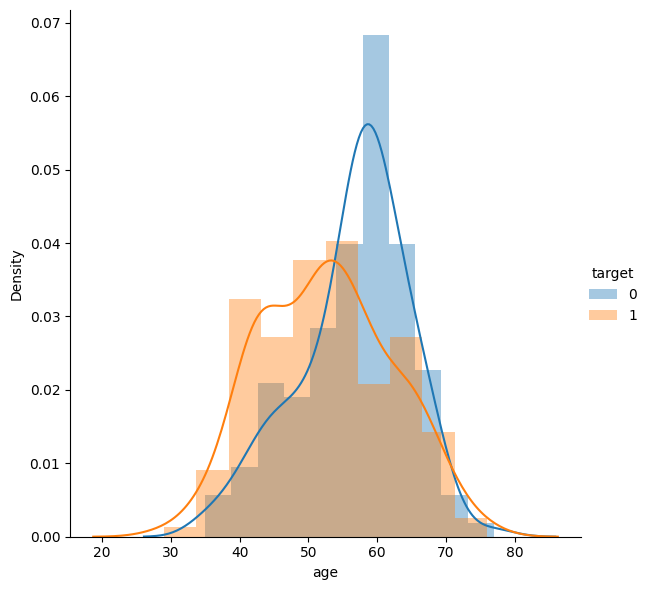

In [17]:
sns.FacetGrid(data=df, hue='target', height= 6).map(sns.distplot, 'age').add_legend()
plt.show()

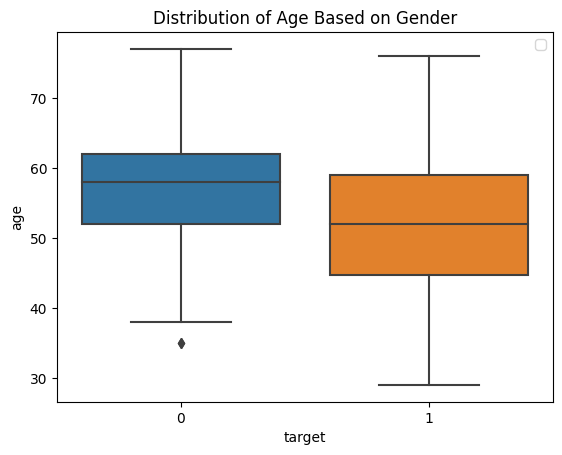

In [18]:
sns.boxplot(data=df, x= 'target', y= 'age')
plt.legend()
plt.title('Distribution of Age Based on Gender')
plt.show()

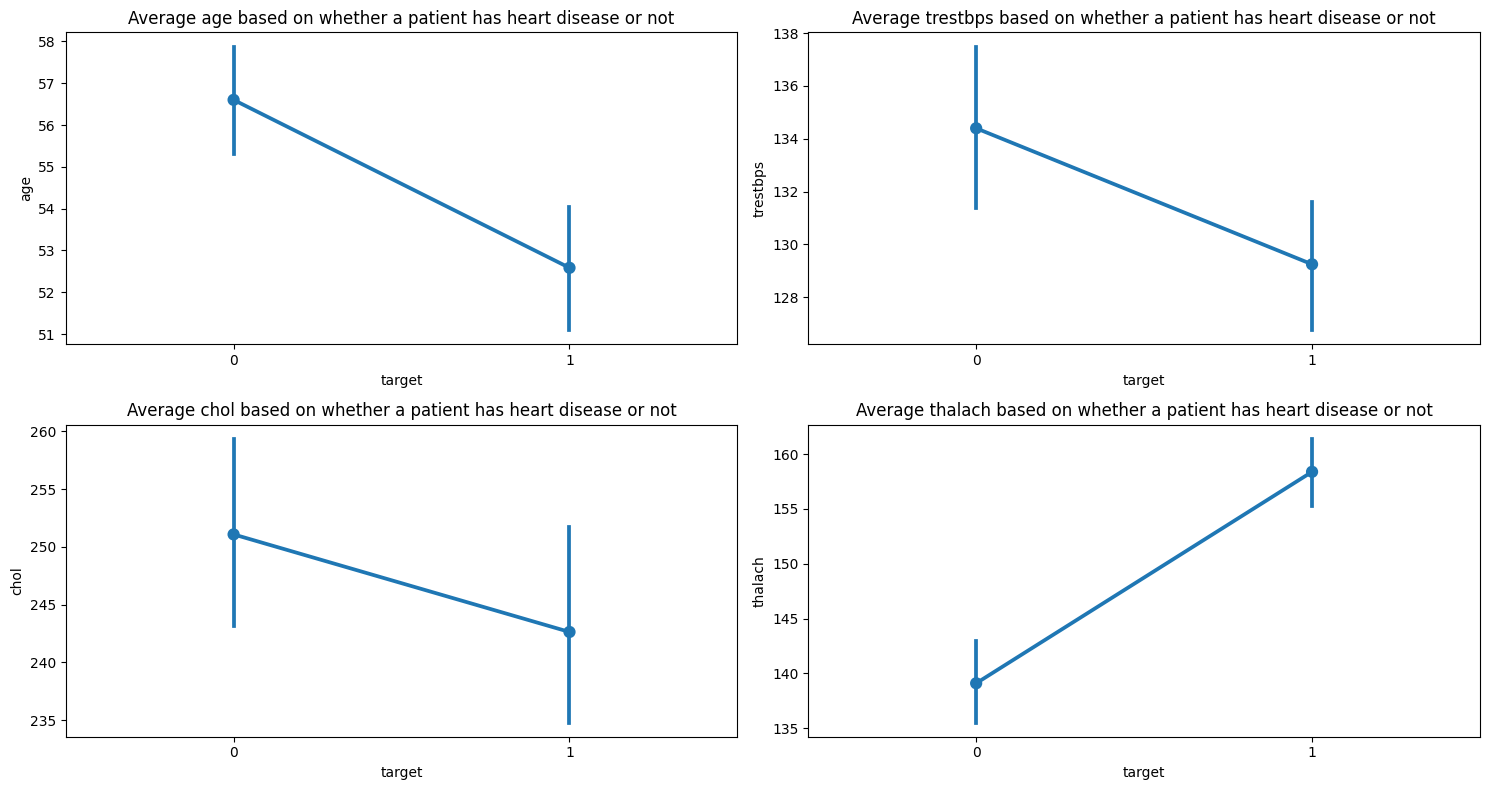

In [19]:
cols = ['age','trestbps', 'chol', 'thalach']
num_features= 3
num_cols= 2
num_rows = (num_features + num_cols-1) // num_cols

plt.figure(figsize= (15,8))

for i,col in enumerate(df[cols]):
  plt.subplot(num_rows,num_cols, i+1)
  sns.pointplot(data=df, x= 'target', y= col)
  plt.title(f'Average {col} based on whether a patient has heart disease or not')

plt.tight_layout()
plt.show()

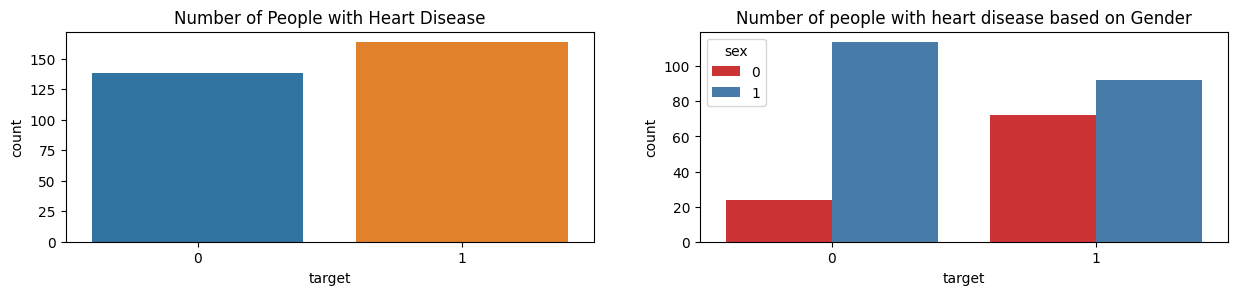

In [20]:
plt.figure(figsize= (15,6))
plt.subplot(2,2,1)
sns.countplot(data=df, x= 'target')
plt.title('Number of People with Heart Disease')
plt.subplot(2,2,2)
sns.countplot(data=df, x= 'target', hue= 'sex', palette= 'Set1')
plt.title("Number of people with heart disease based on Gender")
plt.show()

## Observation

* There are outliers on the some of the numerical data on the dataset, however since this is a medical dataset, we aren't going to eliminate or cap them

* Resting Blood Pressure,cholesterol are skewed to the right indicating presence of potential outliers

* Maximum heart beat Rate is also skewed to the left an indication of outliers

* The number of Females were more than the number of Males that the data were collected From

* The KDE Plot of people with non-heart disease against is leptokurtic implying presence of distinct subpopulations with the same age

* The Median age of patients without heart diseases is highe than the median age of those with heart disease

* The average age of those with heart disease tend to be lower than those without heart disease

* The average resting blood pressure and cholesterol levels also show the same relationship as of the age

* The average maximum heart beat rate on the people wit heart disease tend to be higher than those of their counterparts



# Feature Engineering

In [21]:
min_age,max_age = df['age'].min(), df['age'].max()
print(f'Minimum Age:{min_age}')
print(f'Maximum Age:{max_age}')

Minimum Age:29
Maximum Age:77


In [22]:
def age_group(age):
  if age >= 29 and age <= 39:
    return 'Young Adults'
  elif age > 39 and age <= 59:
    return 'Middle Aged Adults'
  else:
    return 'Elderly Adults'

In [23]:
df['age_group'] = df['age'].apply(age_group)

In [24]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Middle Aged Adults
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Middle Aged Adults
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Elderly Adults


In [25]:
min_chol,max_chol = df['chol'].min(), df['chol'].max()
print(f'Minimum Age:{min_chol}')
print(f'Maximum Age:{max_chol}')

Minimum Age:126
Maximum Age:564


Based on the article I found from the web via the following link,
https://www.medicalnewstoday.com/articles/315900#recommended-levels, I determined that the categories of cholesterol levels depend on age and amount of serum cholesterol. The Criteria to categorize the cholesterol levels is:

* for persons of age less than 19 and cholesterol levels lower or equal to  120md/dl, theyre categorizes as Non-HDL

* for persons of age less than 19 and cholesterol levels lower than 170md/dl, theyre categorizes as Non-HDL

* for persons of age greater than 20 and cholesterol levels less than 130md/dl, theyre categorizes as Non-HDL

* for persons of age greater than 20 and cholesterol levels more or equal to  120md/dl, theyre categorizes as Non-HDL

In [26]:
def cholesterol_levels(age, cholesterol):
    if age < 19 and cholesterol <= 120:
        return 'Non-HDL'
    elif age < 19 and cholesterol < 170:
        return 'Total Cholesterol'
    elif age >= 20 and cholesterol < 130:
        return 'Non-HDL'
    elif age >= 20 and cholesterol >= 130:
        return 'Total Cholesterol'


In [27]:
df['cholesterol_category'] = df.apply(lambda x: cholesterol_levels(x['age'], x['chol']), axis= 1)

In [28]:
df['cholesterol_category'].unique()

array(['Total Cholesterol', 'Non-HDL'], dtype=object)

In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,cholesterol_category
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Middle Aged Adults,Total Cholesterol
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Middle Aged Adults,Total Cholesterol
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Elderly Adults,Total Cholesterol
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Elderly Adults,Total Cholesterol
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Elderly Adults,Total Cholesterol


In [30]:
min_bps,max_bps = df['trestbps'].min(), df['trestbps'].max()
print(f'Minimum Blood Pressure:{min_bps}')
print(f'Maximum Blood Pressure:{max_bps}')

Minimum Blood Pressure:94
Maximum Blood Pressure:200


From the article provided in the link below, I determined how to categorize Blood pressure given the systolic values.
https://www.webmd.com/hypertension-high-blood-pressure/diastolic-and-systolic-blood-pressure-know-your-numbers

* If the Systolic pressure is less than 120, the person is categorized as having normal pressure

* if Systolic pressure is in the range 120-129, one is categorized as having an Elevated Blood pressure

* if Systolic pressure is in the range 130-139, one is categorized as having an Stage 1 Hypertension

* if Systolic pressure is in the range 140-180, one is categorized as having an Stage 2 Hypertension

* if Systolic pressure is beyond, one is categorized as having a Hypertensive Crisis and should seek for help as soon as possible

In [31]:
def blood_pressure(bps):
  if bps < 120:
    return 'Normal'
  elif bps >=120 and bps <=129:
    return 'Elevated'
  elif bps >= 130 and bps <= 139:
    return 'Stage 1 Hypertension'
  elif bps >= 140 and bps <= 180:
    return 'Stage 2 Hypertension'
  else:
    return 'Hypertensive Crisis'

In [32]:
df['blood_pressure'] = df['trestbps'].apply(blood_pressure)

In [33]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,cholesterol_category,blood_pressure
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Middle Aged Adults,Total Cholesterol,Elevated
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Middle Aged Adults,Total Cholesterol,Stage 2 Hypertension
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Elderly Adults,Total Cholesterol,Stage 2 Hypertension
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Elderly Adults,Total Cholesterol,Stage 2 Hypertension
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Elderly Adults,Total Cholesterol,Stage 1 Hypertension


In [34]:
min_thalach,max_thalach = df['thalach'].min(), df['thalach'].max()
print(f'Least Heart Rate:{min_thalach}')
print(f'Maximum Heart Rate:{max_thalach}')

Least Heart Rate:71
Maximum Heart Rate:202


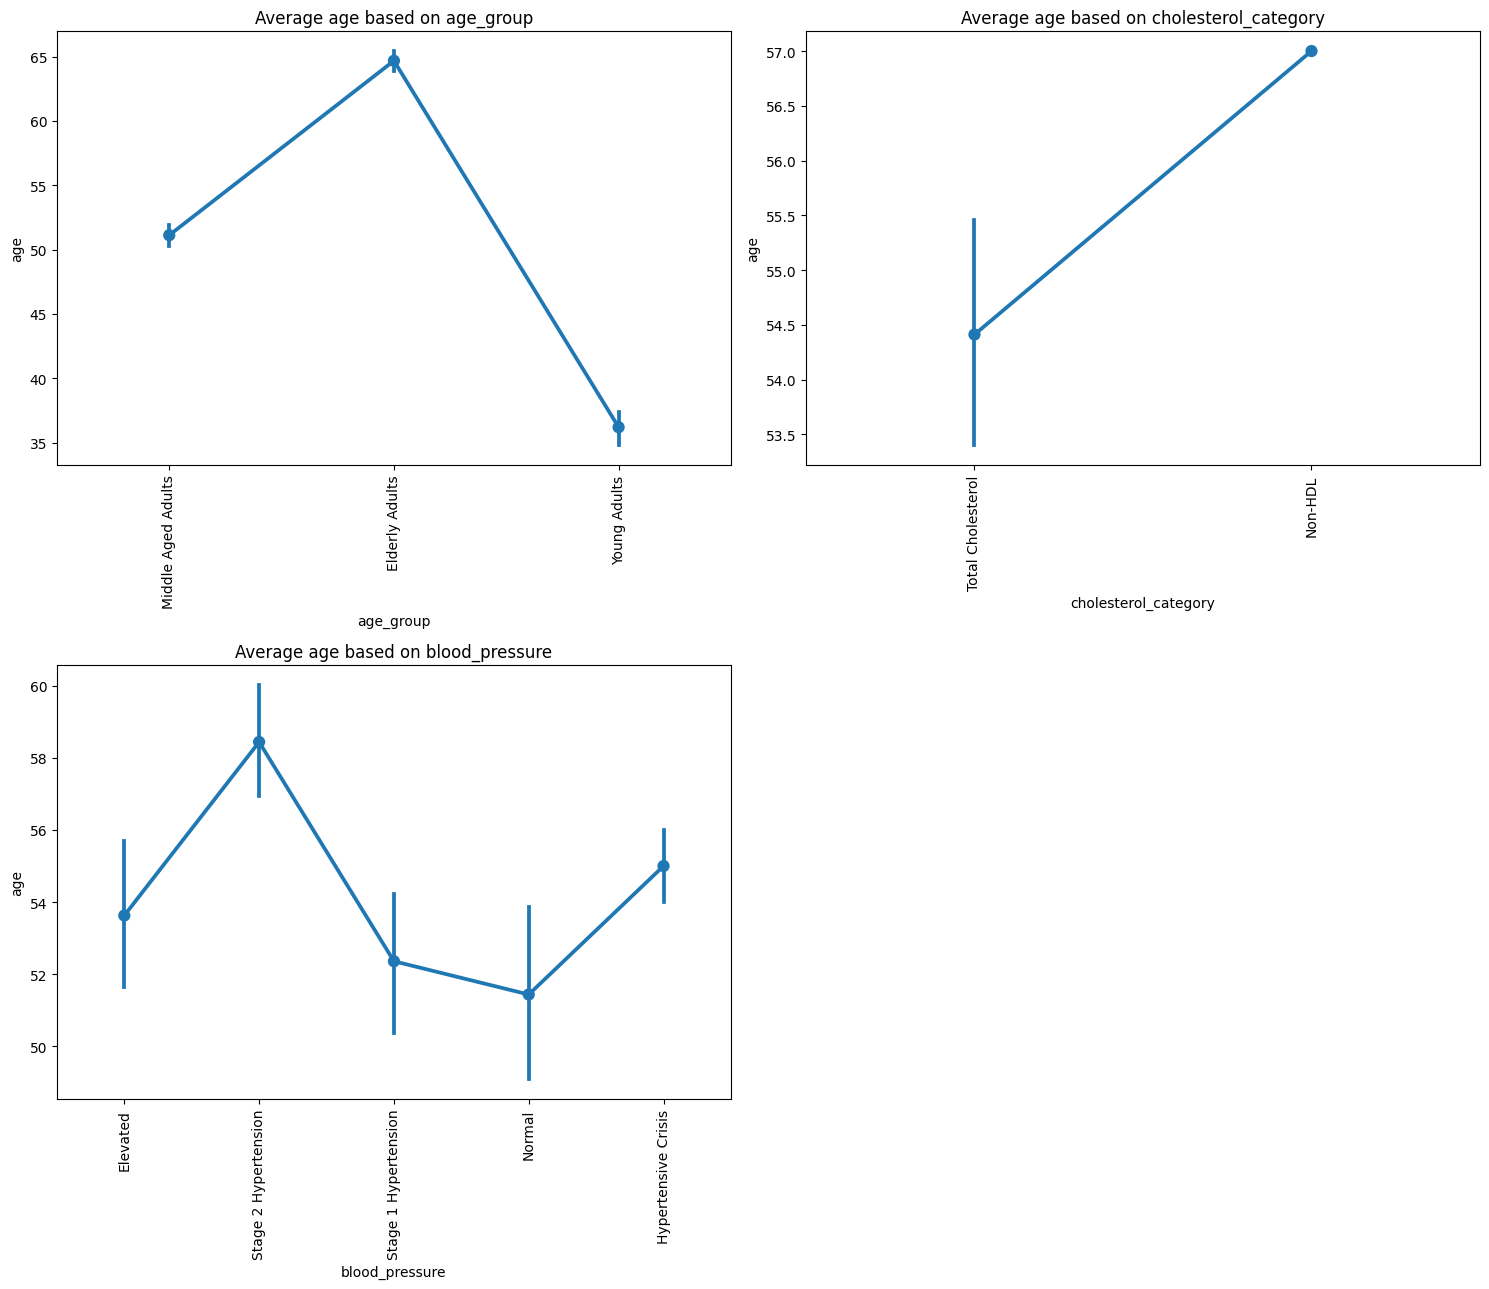

In [35]:
cols = ['age_group', 'cholesterol_category', 'blood_pressure']

num_features = 3
num_cols= 2
num_rows= (num_features + num_cols-1)//num_cols
plt.figure(figsize= (15,13))

for i, feature in enumerate(df[cols]):
  plt.subplot(num_rows, num_cols, i+1)
  sns.pointplot(data=df, x= feature, y= 'age')
  plt.xticks(rotation= 90)
  plt.title(f"Average age based on {feature}")

plt.tight_layout()
plt.show()

In [36]:
age_grouped = df.groupby('age_group')['target'].value_counts().reset_index(name='count')

In [37]:
age_grouped

,age_group,target,count
0,Elderly Adults,0,52
1,Elderly Adults,1,38
2,Middle Aged Adults,1,115
3,Middle Aged Adults,0,82
4,Young Adults,1,11
5,Young Adults,0,4


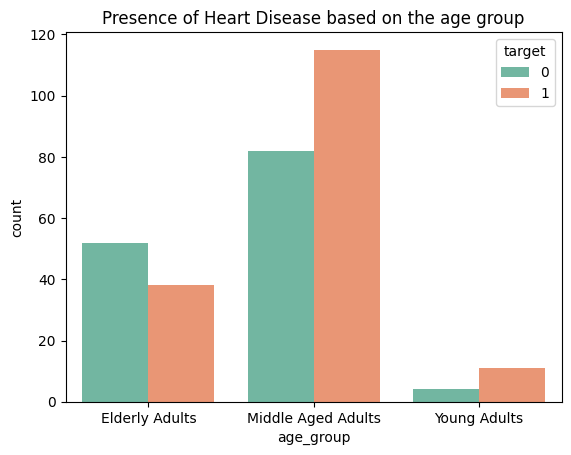

In [38]:
sns.barplot(data=age_grouped, x='age_group', y='count', hue= 'target', palette= 'Set2')
plt.title('Presence of Heart Disease based on the age group')
plt.show()

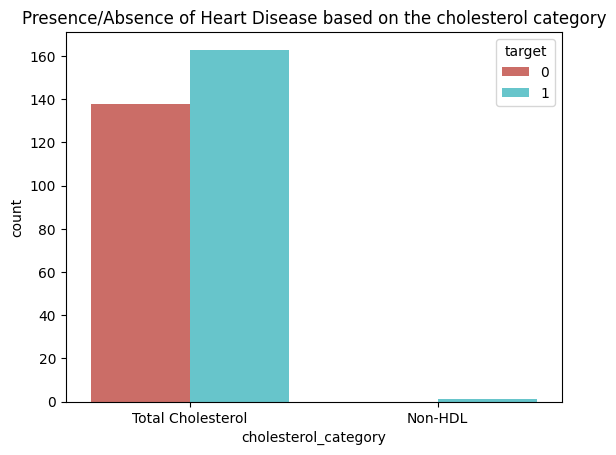

In [39]:
sns.countplot(data=df, x='cholesterol_category', hue= 'target', palette= 'hls')
plt.title("Presence/Absence of Heart Disease based on the cholesterol category")
plt.show()

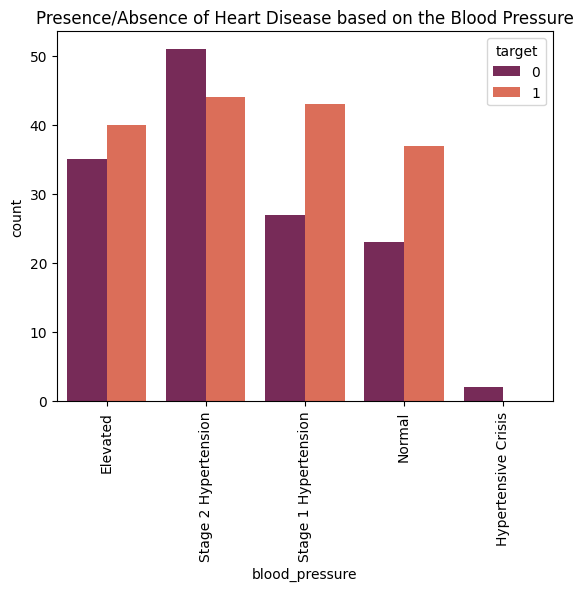

In [40]:
sns.countplot(data=df, x='blood_pressure', hue= 'target', palette= 'rocket')
plt.title("Presence/Absence of Heart Disease based on the Blood Pressure")
plt.xticks(rotation= 90)
plt.show()

In [41]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,cholesterol_category,blood_pressure
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Middle Aged Adults,Total Cholesterol,Elevated


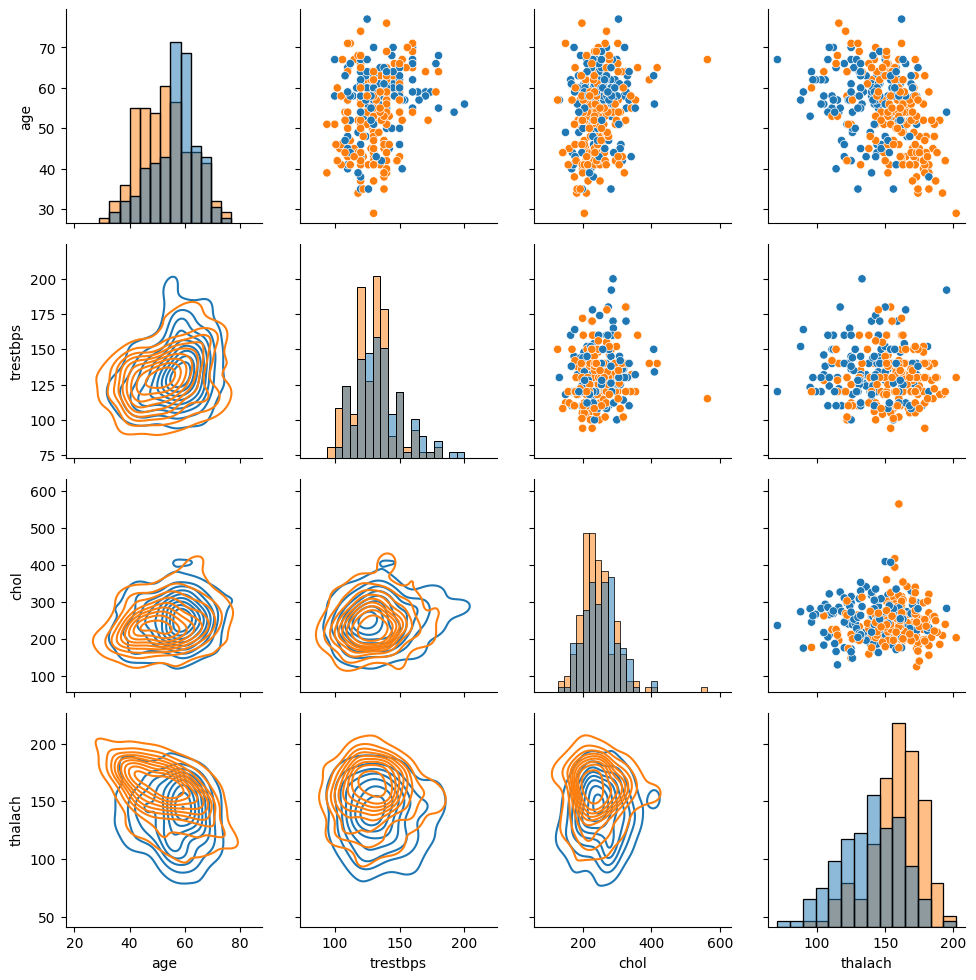

In [42]:
fig = sns.PairGrid(data=df, hue= 'target', vars=['age', 'trestbps', 'chol', 'thalach'])
fig.map_diag(sns.histplot)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot)

plt.show()


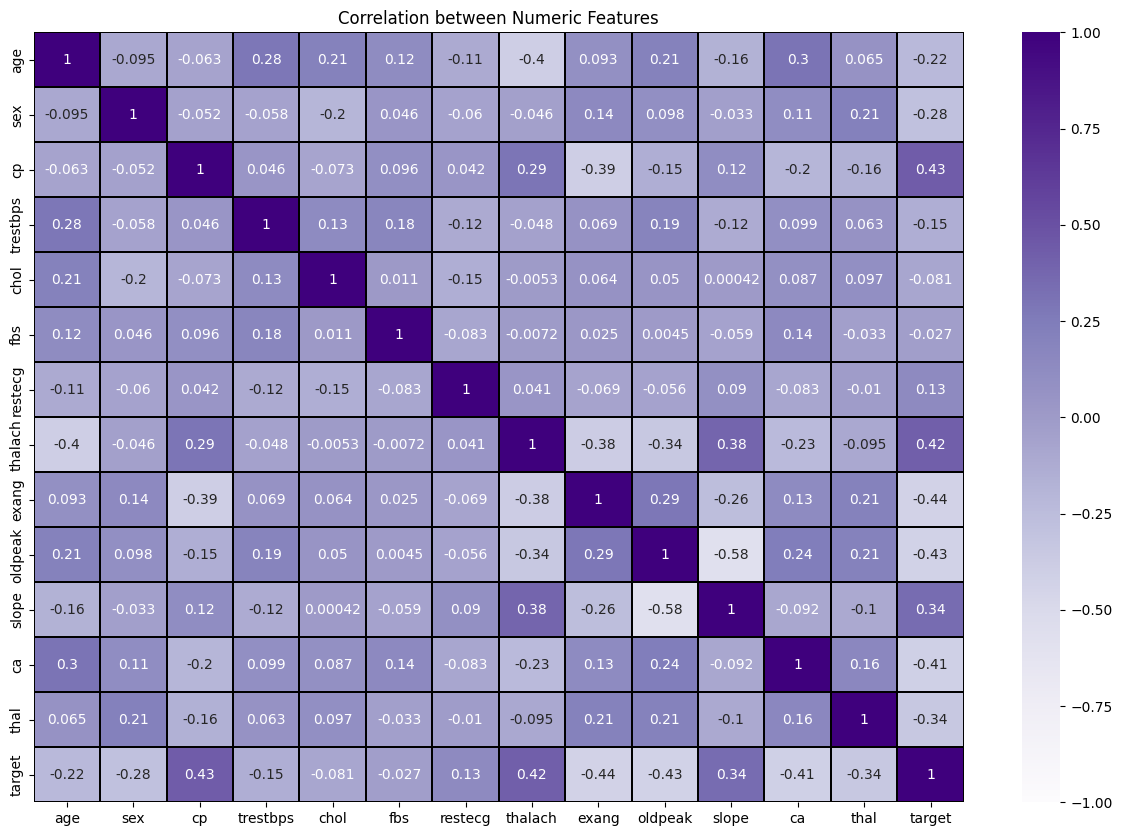

In [43]:
numeric = df.select_dtypes(include= 'number')

corr = numeric.corr()
plt.figure(figsize= (15,10))
sns.heatmap(corr, vmin=-1, vmax=1, cmap='Purples', linecolor='black', linewidth=0.1,annot=True)
plt.title("Correlation between Numeric Features")
plt.show()

**Observation**

The average age of Persons with stage 2 hypertension is higher than all the other blood pressure categories

* The average age of persons with cholesterol levels categorized as Non-HDL is higher than those categorized as Total Cholesterol

* The middle aged people account for a large numbe of persons with heart disease

* A good chunk of those with cholesterol levels categorized as Total Cholesterol have heart disease

* People with Stage 1 Hypertension account for the largest number of people with heart disease followed by people with stage 2 hypertension then those with elevated blood pressure and people with normal, People with Hypertension crisis account for little to no cases of heart diseases

# Data Preprocessing II

In [44]:
df1 = df.copy()

In [45]:
df1.drop(columns= ['age', 'trestbps', 'chol'], inplace= True)

In [46]:
encoder = LabelEncoder()
df1['cholesterol_category'] = encoder.fit_transform(df1['cholesterol_category'])
df1['blood_pressure']= encoder.fit_transform(df1['blood_pressure'])
df1['age_group'] = encoder.fit_transform(df1['age_group'])

In [47]:
X = df1.drop(columns= 'target')
y= df1['target']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, shuffle=True, random_state=0)

print("X-Train Shape:", X_train.shape)
print("X-Test Shape:", X_test.shape)
print("y-Train Shape:", y_train.shape)
print("y-Test Shape:", X_test.shape)

X-Train Shape: (241, 13)
X-Test Shape: (61, 13)
y-Train Shape: (241,)
y-Test Shape: (61, 13)


In [48]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Data Modelling

## Logistic Regression

Logistic Regression Accuracy: 0.819672131147541
Logistic Regression Classification report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.84      0.86      0.85        36

    accuracy                           0.82        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



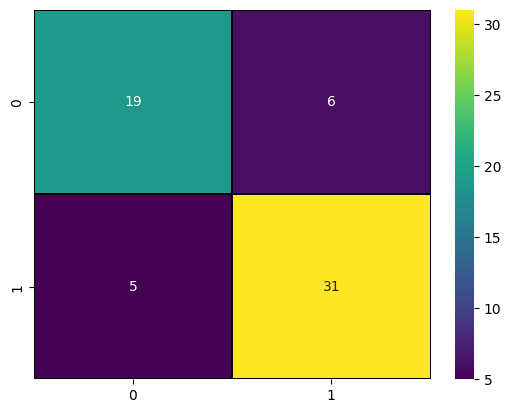

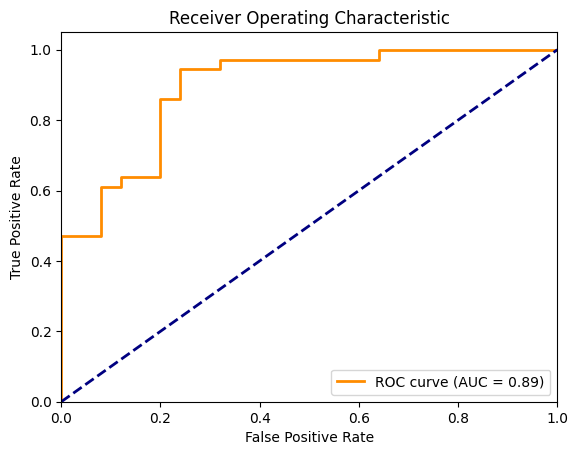

AUC: 0.8944444444444445


In [49]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test= lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_test))
print("Logistic Regression Classification report:\n", classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True, linecolor='black', linewidth= 0.01, cmap= 'viridis')

y_prob = lr.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)

## Multi-Layer Perceptron

Artificial Neural Network Training Set score: 
 0.5311203319502075
Artificial Neural Network Testing Set score: 
 0.5901639344262295
Artificial Neural Network Accuracy score:
  0.5901639344262295
Artificial Neural Network Classification Report:
                precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.59      1.00      0.74        36

    accuracy                           0.59        61
   macro avg       0.30      0.50      0.37        61
weighted avg       0.35      0.59      0.44        61



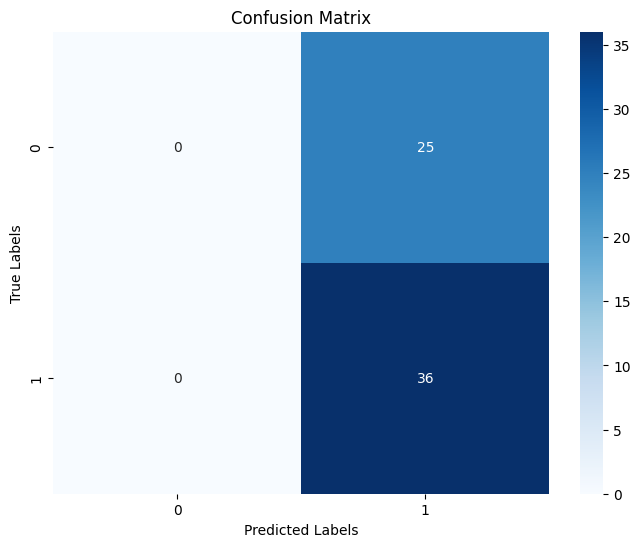

In [50]:
ann = MLPClassifier(solver= 'sgd', hidden_layer_sizes= 100,
                    max_iter= 1000, random_state= 1,
                    learning_rate_init= .01)

ann.fit(X_train, y_train)

ann_ypred = ann.predict(X_test)

print("Artificial Neural Network Training Set score: \n", ann.score(X_train, y_train))

print("Artificial Neural Network Testing Set score: \n", ann.score(X_test, y_test))

print("Artificial Neural Network Accuracy score:\n ", accuracy_score(y_test, ann_ypred))

print("Artificial Neural Network Classification Report:\n ", classification_report(y_test, ann_ypred))

conf_mat = confusion_matrix(y_test, ann_ypred)

plt.figure(figsize=(8, 6))

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted Labels")

plt.ylabel("True Labels")

plt.title("Confusion Matrix")

plt.show()

## K-Nearest Neighbors Classifier

KNN Classifier Training Set score: 
 0.8423236514522822
KNN Classifier Testing Set score: 
 0.7213114754098361
KNN Classifier Accuracy score:
  0.7213114754098361
KNN Classifier Classification Report:
                precision    recall  f1-score   support

           0       0.67      0.64      0.65        25
           1       0.76      0.78      0.77        36

    accuracy                           0.72        61
   macro avg       0.71      0.71      0.71        61
weighted avg       0.72      0.72      0.72        61



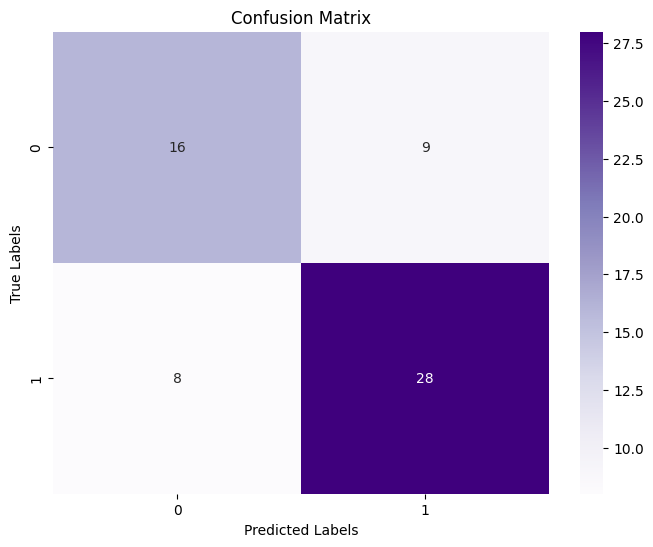

In [51]:
model = knn(n_neighbors= 3)

model.fit(X_train, y_train)

knn_ypred = model.predict(X_test)

print("KNN Classifier Training Set score: \n", model.score(X_train, y_train))

print("KNN Classifier Testing Set score: \n", model.score(X_test, y_test))

print("KNN Classifier Accuracy score:\n ", accuracy_score(y_test, knn_ypred))

print("KNN Classifier Classification Report:\n ", classification_report(y_test, knn_ypred))

conf_mat = confusion_matrix(y_test, knn_ypred)

plt.figure(figsize=(8, 6))

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Purples")

plt.xlabel("Predicted Labels")

plt.ylabel("True Labels")

plt.title("Confusion Matrix")

plt.show()

## Decision Tree Classifier

Decision Tree Classifier Training Set score: 
 1.0
Decision Tree Classifier Testing Set score: 
 0.7377049180327869
Decision Tree Classifier Accuracy score:
  0.7377049180327869
Decision Tree Classifier Classification Report:
                precision    recall  f1-score   support

           0       0.68      0.68      0.68        25
           1       0.78      0.78      0.78        36

    accuracy                           0.74        61
   macro avg       0.73      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61



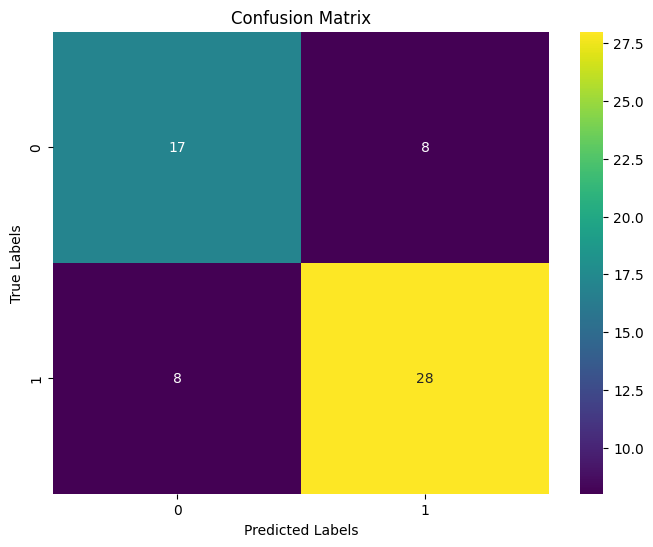

In [52]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

dt_ypred = dt.predict(X_test)

print("Decision Tree Classifier Training Set score: \n", dt.score(X_train, y_train))

print("Decision Tree Classifier Testing Set score: \n", dt.score(X_test, y_test))

print("Decision Tree Classifier Accuracy score:\n ", accuracy_score(y_test, dt_ypred))

print("Decision Tree Classifier Classification Report:\n ", classification_report(y_test, dt_ypred))

conf_mat = confusion_matrix(y_test, dt_ypred)

plt.figure(figsize=(8, 6))

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="viridis")

plt.xlabel("Predicted Labels")

plt.ylabel("True Labels")

plt.title("Confusion Matrix")

plt.show()

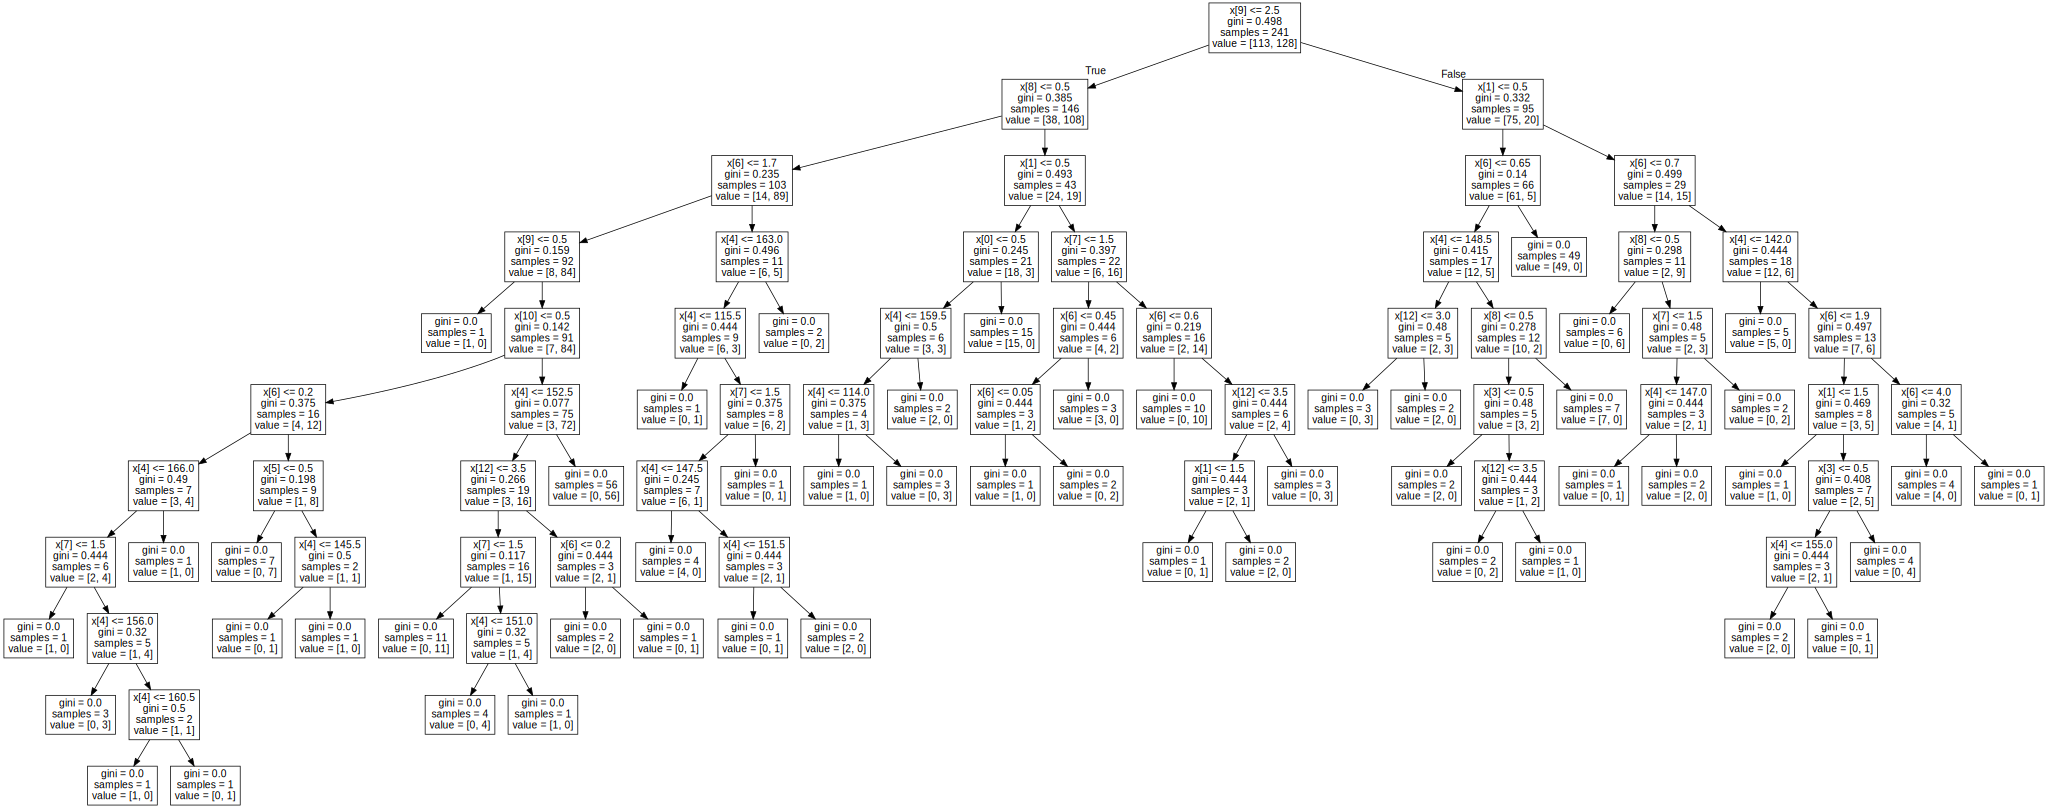

In [53]:
dot_data = export_graphviz(dt, out_file= None)

graph = graphviz.Source(dot_data)

graph

### HyperParameter Tuning the Decision Tree Classifier

In [54]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid = {

              'criterion' : ['gini', 'entropy', 'log_loss'],

              'splitter' : ['random', 'best'],

              'max_depth' : (list(range(1,21))),

              'min_samples_leaf' : (list(range(1,21))),

              'max_features' : ['auto', 'sqrt', 'log2'],

              'min_samples_split' : [2,3,4,5]
}

dt_grid = GridSearchCV(estimator= dt, param_grid= param_grid, scoring= 'recall', cv= 5, n_jobs= -1)

dt_grid.fit(X_train, y_train)

print(dt_grid.best_params_)

{'criterion': 'log_loss', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'min_samples_split': 3, 'splitter': 'random'}


### Implementation of the HyperParameters from GridSearchCV

Decision Tree Classifier Training Set score: 
 0.7842323651452282
Decision Tree Classifier Testing Set score: 
 0.6885245901639344
Decision Tree Classifier Accuracy score:
  0.6885245901639344
Decision Tree Classifier Classification Report:
                precision    recall  f1-score   support

           0       0.58      0.84      0.69        25
           1       0.84      0.58      0.69        36

    accuracy                           0.69        61
   macro avg       0.71      0.71      0.69        61
weighted avg       0.73      0.69      0.69        61



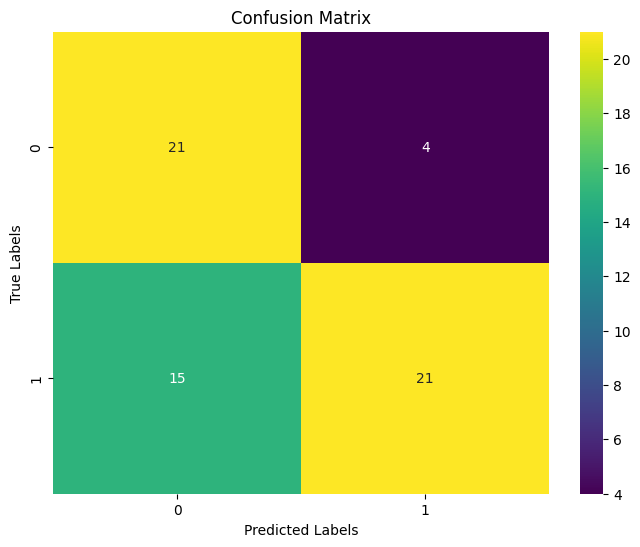

In [61]:
dt = DecisionTreeClassifier(criterion = 'log_loss', max_depth= 12, max_features= 'sqrt',
                            min_samples_leaf= 16, min_samples_split= 3, splitter= 'random')

dt.fit(X_train, y_train)

dt_ypred = dt.predict(X_test)

print("Decision Tree Classifier Training Set score: \n", dt.score(X_train, y_train))

print("Decision Tree Classifier Testing Set score: \n", dt.score(X_test, y_test))

print("Decision Tree Classifier Accuracy score:\n ", accuracy_score(y_test, dt_ypred))

print("Decision Tree Classifier Classification Report:\n ", classification_report(y_test, dt_ypred))

conf_mat = confusion_matrix(y_test, dt_ypred)

plt.figure(figsize=(8, 6))

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="viridis")

plt.xlabel("Predicted Labels")

plt.ylabel("True Labels")

plt.title("Confusion Matrix")

plt.show()

### Hyperparameter Tuning for Decision Tree Classifier using Randomized Search CV

In [55]:
dt_rand = RandomizedSearchCV(estimator= dt, param_distributions= param_grid,
                             n_jobs= -1, refit= True, cv= 5, scoring= 'recall')

dt_rand.fit(X_train, y_train)

print(dt_rand.best_params_)

{'splitter': 'best', 'min_samples_split': 3, 'min_samples_leaf': 18, 'max_features': 'auto', 'max_depth': 4, 'criterion': 'gini'}


### Implementation of the HyperParameters from RandomizedSearchCV

Decision Tree Classifier Training Set score: 
 0.8257261410788381
Decision Tree Classifier Testing Set score: 
 0.7377049180327869
Decision Tree Classifier Accuracy score:
  0.7377049180327869
Decision Tree Classifier Classification Report:
                precision    recall  f1-score   support

           0       0.71      0.60      0.65        25
           1       0.75      0.83      0.79        36

    accuracy                           0.74        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.74      0.74      0.73        61



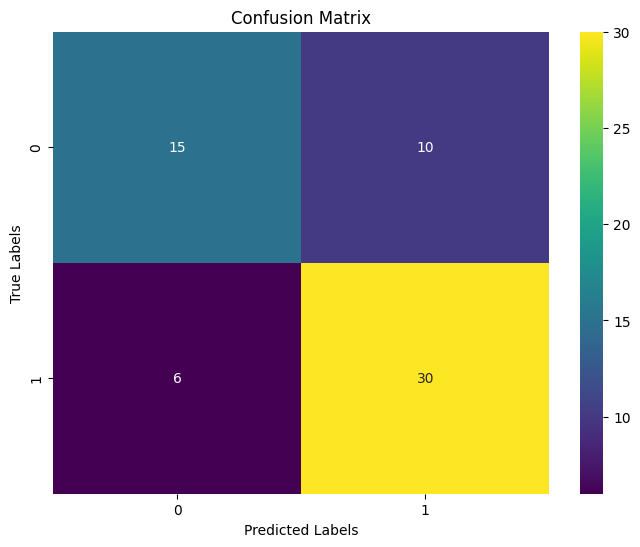

In [62]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth= 4, max_features= 'auto',
                            min_samples_leaf= 18, min_samples_split= 3, splitter= 'best')

dt.fit(X_train, y_train)

dt_ypred = dt.predict(X_test)

print("Decision Tree Classifier Training Set score: \n", dt.score(X_train, y_train))

print("Decision Tree Classifier Testing Set score: \n", dt.score(X_test, y_test))

print("Decision Tree Classifier Accuracy score:\n ", accuracy_score(y_test, dt_ypred))

print("Decision Tree Classifier Classification Report:\n ", classification_report(y_test, dt_ypred))

conf_mat = confusion_matrix(y_test, dt_ypred)

plt.figure(figsize=(8, 6))

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="viridis")

plt.xlabel("Predicted Labels")

plt.ylabel("True Labels")

plt.title("Confusion Matrix")

plt.show()

## Random Forest Classifier

Random Forest Classifier Training Set score: 
 1.0
Random Forest Classifier Testing Set score: 
 0.7868852459016393
Random Forest Classifier Accuracy score:
  0.7868852459016393
Random Forest Classifier Classification Report:
                precision    recall  f1-score   support

           0       0.75      0.72      0.73        25
           1       0.81      0.83      0.82        36

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



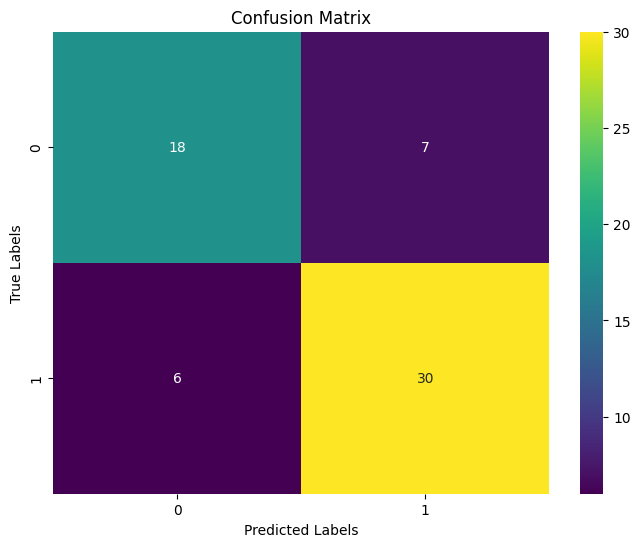

In [56]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_ypred = rf.predict(X_test)

print("Random Forest Classifier Training Set score: \n", rf.score(X_train, y_train))

print("Random Forest Classifier Testing Set score: \n", rf.score(X_test, y_test))

print("Random Forest Classifier Accuracy score:\n ", accuracy_score(y_test, rf_ypred))

print("Random Forest Classifier Classification Report:\n ", classification_report(y_test, rf_ypred))

conf_mat = confusion_matrix(y_test, rf_ypred)

plt.figure(figsize=(8, 6))

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="viridis")

plt.xlabel("Predicted Labels")

plt.ylabel("True Labels")

plt.title("Confusion Matrix")

plt.show()

## Bagging Classifier

Bagging Classifier:
> Accuracy on training data = 0.9461
> Accuracy on Testing data = 0.8033
Bagging Classifier Accuracy score:
  0.8032786885245902
Bagging Classifier Classification Report:
                precision    recall  f1-score   support

           0       0.76      0.76      0.76        25
           1       0.83      0.83      0.83        36

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



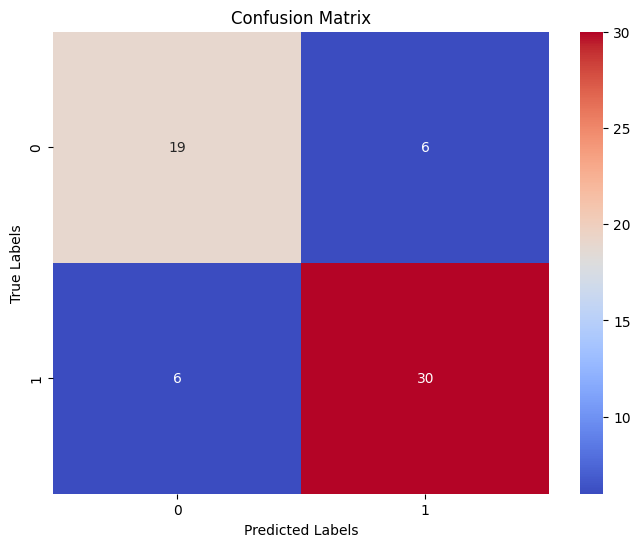

In [57]:
#Using the Random Forest Model as the base model

rf = RandomForestClassifier()

bc_params = {'base_estimator': rf, 'n_estimators': 50, 'max_samples': 0.5, 'random_state': 11, 'n_jobs': -1}

bc = BaggingClassifier(**bc_params)

bc.fit(X_train, y_train)

bc_ypreds_train = bc.predict(X_train)

bc_ypreds_test = bc.predict(X_test)

print('Bagging Classifier:\n> Accuracy on training data = {:.4f}'

      '\n> Accuracy on Testing data = {:.4f}'.format(accuracy_score(y_true=y_train,y_pred=bc_ypreds_train),accuracy_score(y_true=y_test, y_pred=bc_ypreds_test)))

print("Bagging Classifier Accuracy score:\n ", accuracy_score(y_test, bc_ypreds_test))

print("Bagging Classifier Classification Report:\n ", classification_report(y_test, bc_ypreds_test))

conf_mat = confusion_matrix(y_test, bc_ypreds_test)

plt.figure(figsize=(8, 6))

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="coolwarm")

plt.xlabel("Predicted Labels")

plt.ylabel("True Labels")

plt.title("Confusion Matrix")

plt.show()


## Gradient Boosting Classifier

Gradient Boosting Classifier:
> Accuracy on training data = 0.9917
> Accuracy on testing data = 0.7705
Gradient Boosting Classifier Accuracy score:
  0.7704918032786885
Gradient Boosting  Classifier Classification Report:
                precision    recall  f1-score   support

           0       0.70      0.76      0.73        25
           1       0.82      0.78      0.80        36

    accuracy                           0.77        61
   macro avg       0.76      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



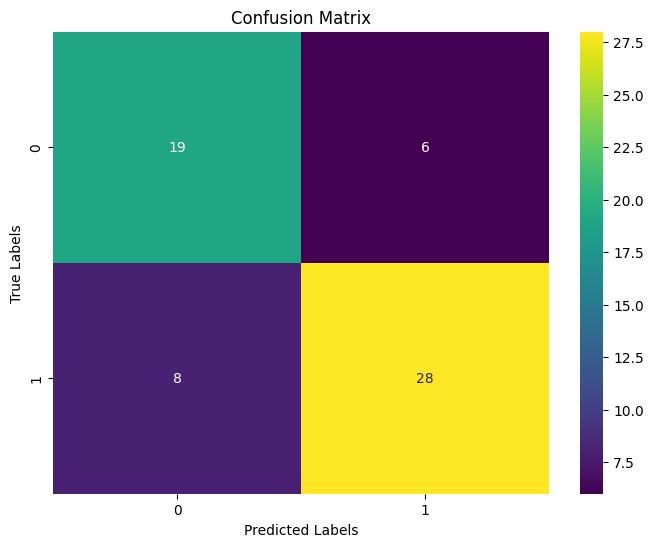

In [58]:
gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)

gb_ypred_train = gb.predict(X_train)

gb_ypred_test = gb.predict(X_test)

print('Gradient Boosting Classifier:'\

      '\n> Accuracy on training data = {:.4f}'\

      '\n> Accuracy on testing data = {:.4f}'\

      .format(accuracy_score(y_true=y_train, \

                             y_pred=gb_ypred_train), \

      accuracy_score(y_true=y_test, y_pred=gb_ypred_test)))

print("Gradient Boosting Classifier Accuracy score:\n ", accuracy_score(y_test, gb_ypred_test))

print("Gradient Boosting  Classifier Classification Report:\n ", classification_report(y_test, gb_ypred_test))

conf_mat = confusion_matrix(y_test, gb_ypred_test)

plt.figure(figsize=(8, 6))

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="viridis")

plt.xlabel("Predicted Labels")

plt.ylabel("True Labels")

plt.title("Confusion Matrix")

plt.show()

## AdaBoost Classifier

AdaBoost Classifier Accuracy score on Training Set: 0.9045643153526971
AdaBoost Classifier Accuracy score on Testing Set: 0.7868852459016393
AdaBoost Classifier Accuracy score:
  0.7868852459016393
AdaBoost Classifier Classification Report:
                precision    recall  f1-score   support

           0       0.73      0.76      0.75        25
           1       0.83      0.81      0.82        36

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



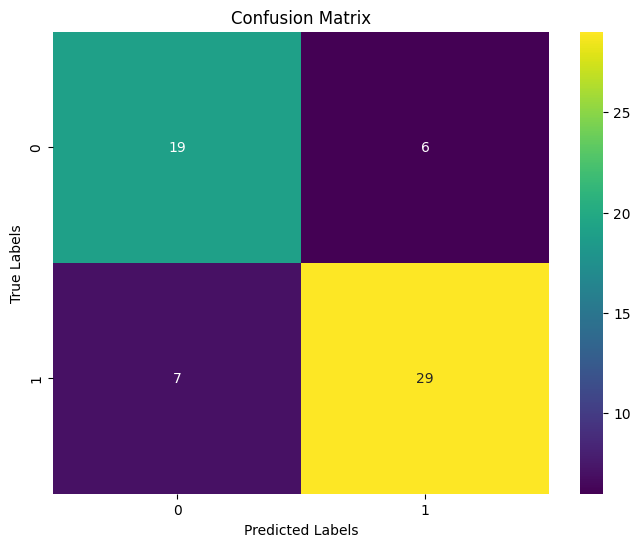

In [59]:
ad = AdaBoostClassifier()

ad.fit(X_train, y_train)

ad_ypred_test = ad.predict(X_test)

ad_ypred_train = ad.predict(X_train)

print("AdaBoost Classifier Accuracy score on Training Set:", accuracy_score(y_true= y_train, y_pred = ad_ypred_train))

print("AdaBoost Classifier Accuracy score on Testing Set:", accuracy_score(y_true= y_test, y_pred = ad_ypred_test))

print("AdaBoost Classifier Accuracy score:\n ", accuracy_score(y_test, ad_ypred_test))

print("AdaBoost Classifier Classification Report:\n ", classification_report(y_test, ad_ypred_test))

conf_mat = confusion_matrix(y_test, ad_ypred_test)

plt.figure(figsize=(8, 6))

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="viridis")

plt.xlabel("Predicted Labels")

plt.ylabel("True Labels")

plt.title("Confusion Matrix")

plt.show()

## Bagging Random Forest with adaboost classifier

Bagging AdaBoost Classifier:
> Accuracy on training data = 1.0000
> Accuracy on Testing data = 0.7705
Bagging AdaBoost Classifier Accuracy score:
  0.7704918032786885
Bagging AdaBoost Classifier Classification Report:
                precision    recall  f1-score   support

           0       0.74      0.68      0.71        25
           1       0.79      0.83      0.81        36

    accuracy                           0.77        61
   macro avg       0.76      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



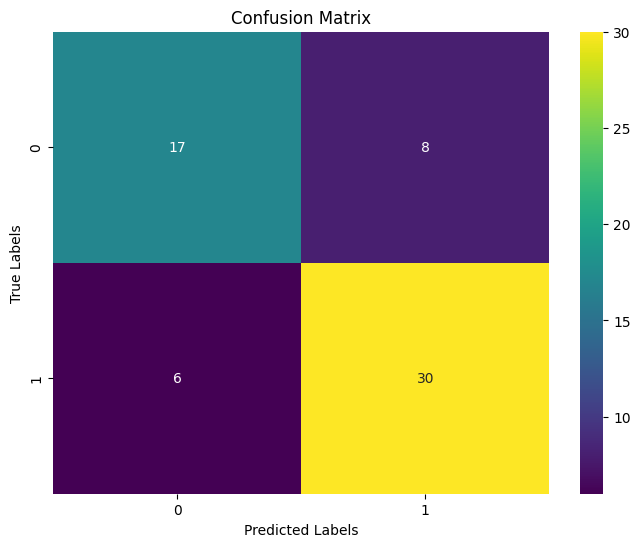

In [60]:
#Using the Random Forest Model as the base model

rf = RandomForestClassifier()

ad_params = {'n_estimators': 100, 'base_estimator': rf, \

             'random_state': 11}

ad = AdaBoostClassifier(**ad_params)

ad.fit(X_train, y_train)

ad_ypreds_train = ad.predict(X_train)

ad_ypreds_test = ad.predict(X_test)

print('Bagging AdaBoost Classifier:\n> Accuracy on training data = {:.4f}'

      '\n> Accuracy on Testing data = {:.4f}'.format(accuracy_score(y_true=y_train,y_pred=ad_ypreds_train),accuracy_score(y_true=y_test, y_pred=ad_ypreds_test)))

print("Bagging AdaBoost Classifier Accuracy score:\n ", accuracy_score(y_test, ad_ypreds_test))

print("Bagging AdaBoost Classifier Classification Report:\n ", classification_report(y_test, ad_ypreds_test))

conf_mat = confusion_matrix(y_test, ad_ypreds_test)

plt.figure(figsize=(8, 6))

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="viridis")

plt.xlabel("Predicted Labels")

plt.ylabel("True Labels")

plt.title("Confusion Matrix")

plt.show()
